In [10]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# Paths to your data directories
train_path = r"H:\preprocced_data_with_augmented_splitted\train"
test_path = r"H:\preprocced_data_with_augmented_splitted\test"
val_path = r"H:\preprocced_data_with_augmented_splitted\val"



In [11]:
IMG_SIZE = (128, 128)  # Image size as per your preprocessing


In [12]:

# Function to load data from directory
def load_data_from_directory(path):
    X = []
    y = []
    class_dirs = os.listdir(path)
    label_encoder = {class_name: idx for idx, class_name in enumerate(class_dirs)}

    for class_dir in class_dirs:
        class_path = os.path.join(path, class_dir)
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, IMG_SIZE)
            X.append(img)
            y.append(label_encoder[class_dir])

    X = np.array(X).reshape(-1, IMG_SIZE[0], IMG_SIZE[1], 1)
    y = np.array(y)
    return X, y, label_encoder

# Load the data
X_train, y_train, label_encoder = load_data_from_directory(train_path)
X_test, y_test, _ = load_data_from_directory(test_path)
X_val, y_val, _ = load_data_from_directory(val_path)

# Normalize pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0

# Convert labels to categorical
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
y_val = to_categorical(y_val, num_classes)


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [14]:

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))


Epoch 1/50
273/273 [==============================] - 6s 16ms/step - loss: 4.2099 - accuracy: 0.0737 - val_loss: 3.1135 - val_accuracy: 0.2982
Epoch 2/50
273/273 [==============================] - 4s 13ms/step - loss: 2.7140 - accuracy: 0.2910 - val_loss: 1.3036 - val_accuracy: 0.7277
Epoch 3/50
273/273 [==============================] - 4s 14ms/step - loss: 1.8019 - accuracy: 0.4829 - val_loss: 0.6673 - val_accuracy: 0.8590
Epoch 4/50
273/273 [==============================] - 4s 13ms/step - loss: 1.4047 - accuracy: 0.5738 - val_loss: 0.4065 - val_accuracy: 0.9077
Epoch 5/50
273/273 [==============================] - 4s 14ms/step - loss: 1.1621 - accuracy: 0.6351 - val_loss: 0.2958 - val_accuracy: 0.9366
Epoch 6/50
273/273 [==============================] - 4s 13ms/step - loss: 1.0401 - accuracy: 0.6707 - val_loss: 0.2041 - val_accuracy: 0.9569
Epoch 7/50
273/273 [==============================] - 4s 13ms/step - loss: 0.9227 - accuracy: 0.6977 - val_loss: 0.1687 - val_accuracy: 0.9650

In [15]:

import json
# Paths to save the model and label encoder
model_save_path = r"H:\1.organized\allModel\1.best_CustomCNN_cow_identifier_model.h5"
label_encoder_save_path = r"H:\1.organized\allModel\1.best_CustomCNN_cow_label_encoder.json"

# Save the model and label encoder
os.makedirs(os.path.dirname(model_save_path), exist_ok=True)
model.save(model_save_path)

# Save the label encoder to a JSON file
with open(label_encoder_save_path, 'w') as f:
    json.dump(label_encoder, f)


In [16]:
import json

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Test Accuracy: {test_acc}")
print(f"Validation Accuracy: {val_acc}")


62/62 [==============================] - 0s 4ms/step - loss: 0.0309 - accuracy: 0.9914
Test Accuracy: 0.9896570444107056
Validation Accuracy: 0.9913793206214905


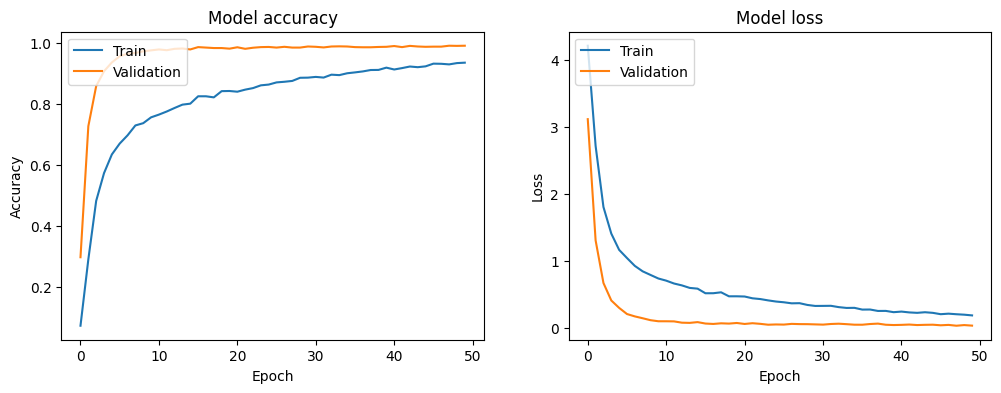

In [17]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Generate classification report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=list(label_encoder.keys())))




58/58 [==============================] - 0s 3ms/step
Classification Report:
              precision    recall  f1-score   support

       cow_1       0.93      1.00      0.97        14
      cow_10       1.00      1.00      1.00        25
     cow_101       1.00      1.00      1.00        10
     cow_110       1.00      1.00      1.00         8
     cow_112       1.00      1.00      1.00        21
     cow_113       0.84      1.00      0.91        21
     cow_124       1.00      1.00      1.00        18
     cow_126       1.00      1.00      1.00        18
     cow_127       1.00      1.00      1.00        27
     cow_129       1.00      1.00      1.00        11
      cow_13       1.00      1.00      1.00        25
     cow_140       1.00      0.92      0.96        12
     cow_157       1.00      1.00      1.00        14
     cow_158       1.00      1.00      1.00        10
     cow_168       0.95      1.00      0.97        18
      cow_17       1.00      1.00      1.00        20
     

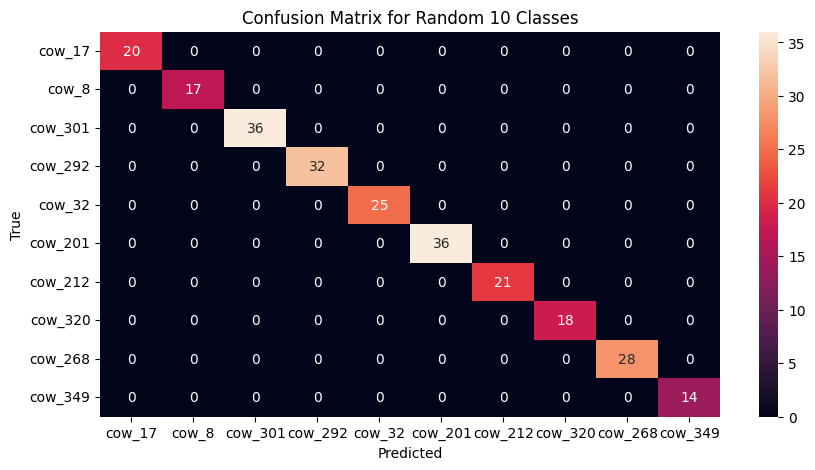

In [32]:

# Get class names
class_names = list(label_encoder.keys())

# Select 5 specific classes for confusion matrix
selected_classes = [15, 99,67, 60, 75,20,22,76,44,87]  # Replace with the indices of the classes you want to include
selected_class_names = [class_names[idx] for idx in selected_classes]

selected_indices = [np.where(y_true == cls)[0] for cls in selected_classes]
selected_indices = np.concatenate(selected_indices)

conf_matrix = confusion_matrix(y_true[selected_indices], y_pred_classes[selected_indices], labels=selected_classes)

# Create a labeled confusion matrix
plt.figure(figsize=(10, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=selected_class_names, yticklabels=selected_class_names)
plt.title('Confusion Matrix for Random 10 Classes')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [20]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model  # Ensure load_model is imported
import json

# Function to load and preprocess image
def preprocess_image(image_path, IMG_SIZE):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, IMG_SIZE)
    equalized = cv2.equalizeHist(image)
    gaussian_filtered = cv2.GaussianBlur(equalized, (5, 5), 0)
    image = gaussian_filtered.astype('float32') / 255.0
    image = np.expand_dims(image, axis=-1)  # Add channel dimension
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Function to predict class of an image
def predict_class(img_path, model, label_encoder, IMG_SIZE):
    img = preprocess_image(img_path, IMG_SIZE)
    prediction = model.predict(img)
    predicted_class_idx = np.argmax(prediction)
    predicted_class_name = list(label_encoder.keys())[predicted_class_idx]
    return predicted_class_name

# Paths to saved model and label encoder
model_save_path = r"H:\1.organized\allModel\1.best_CustomCNN_cow_identifier_model.h5"
label_encoder_save_path = r"H:\1.organized\allModel\1.best_CustomCNN_cow_label_encoder.json"
IMG_SIZE = (128, 128)  # Image size as per your preprocessing

# Load the trained model
model = load_model(model_save_path)

# Load the label encoder from the JSON file
with open(label_encoder_save_path, 'r') as f:
    label_encoder = json.load(f)

# Predict the class of a new image
new_image_path = r"F:\Thesis\Final Dataset\cow_343\cow_343_1.jpg"  # Replace with the path to your image
predicted_class_name = predict_class(new_image_path, model, label_encoder, IMG_SIZE)
print(f"The predicted class for the image is: {predicted_class_name}")


1/1 [==============================] - 0s 120ms/step
The predicted class for the image is: cow_343


58/58 [==============================] - 0s 7ms/step


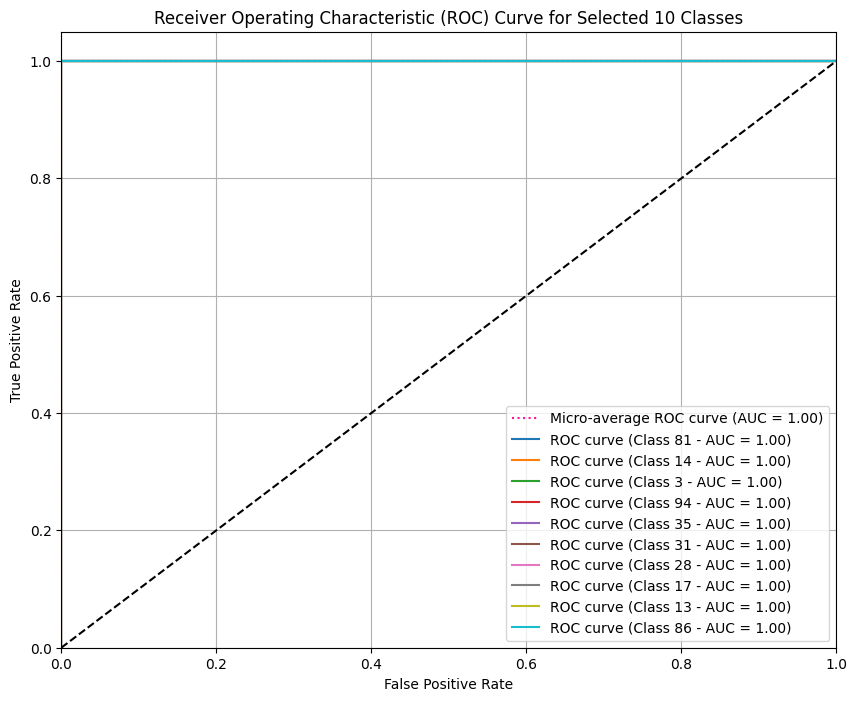

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import random

# Select 10 random classes from your dataset
random.seed(42)  # Set seed for reproducibility
selected_classes = random.sample(range(num_classes), 10)

# Convert labels to binary matrix representation for selected classes
y_test_bin = label_binarize(y_test.argmax(axis=1), classes=np.arange(num_classes))

# Predict probabilities for each class
y_score = model.predict(X_test)

# Compute ROC curve and ROC area for each selected class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in selected_classes:
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area for selected classes
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin[:, selected_classes].ravel(), y_score[:, selected_classes].ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for each selected class
plt.figure(figsize=(10, 8))
plt.plot(fpr["micro"], tpr["micro"], label=f'Micro-average ROC curve (AUC = {roc_auc["micro"]:.2f})', color='deeppink', linestyle=':')
for i in selected_classes:
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (Class {i} - AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Selected 10 Classes')
plt.legend(loc="lower right")
plt.grid()
plt.show()


58/58 [==============================] - 0s 8ms/step


<Figure size 1000x800 with 0 Axes>

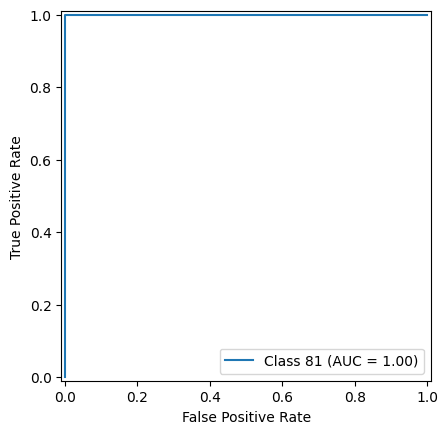

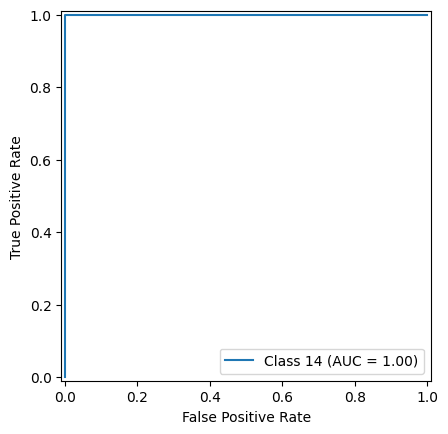

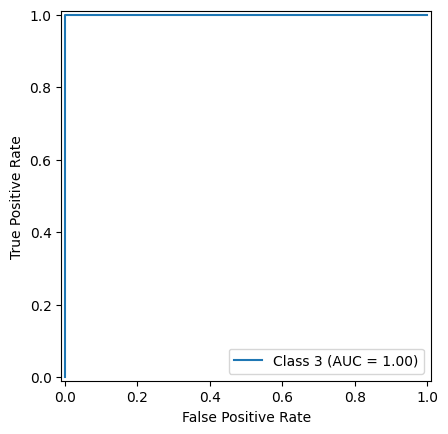

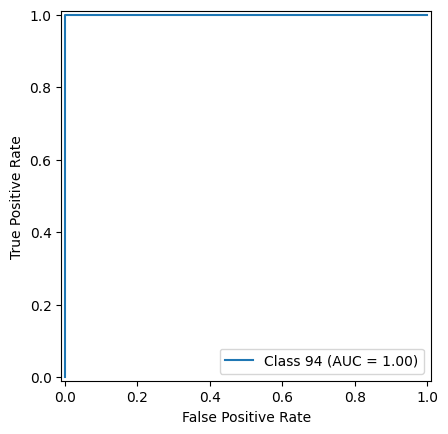

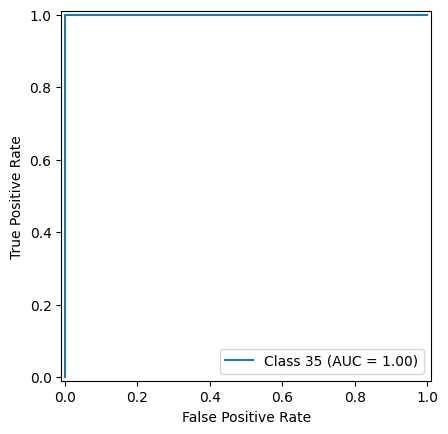

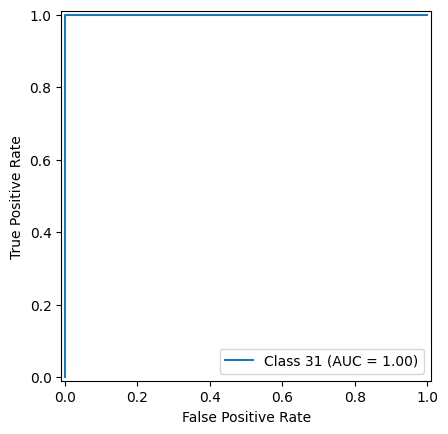

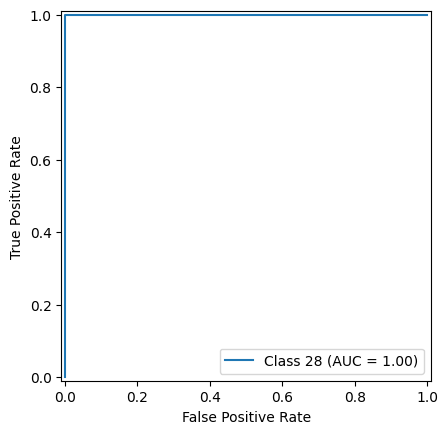

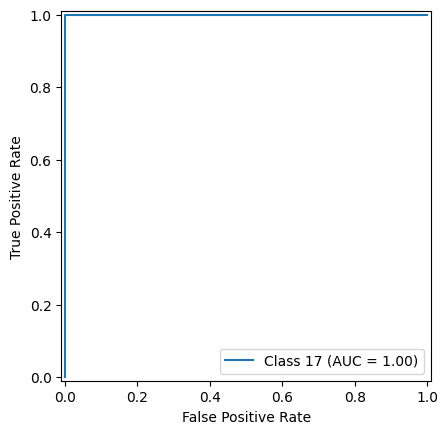

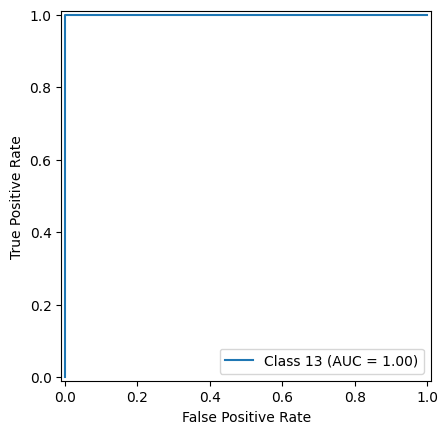

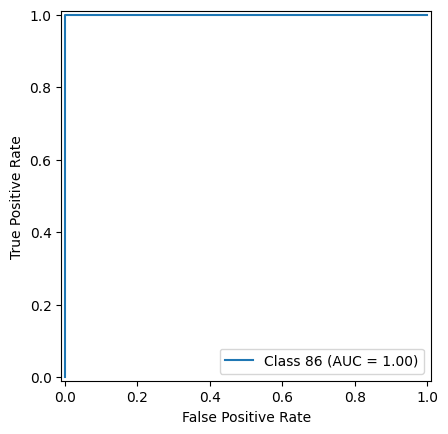

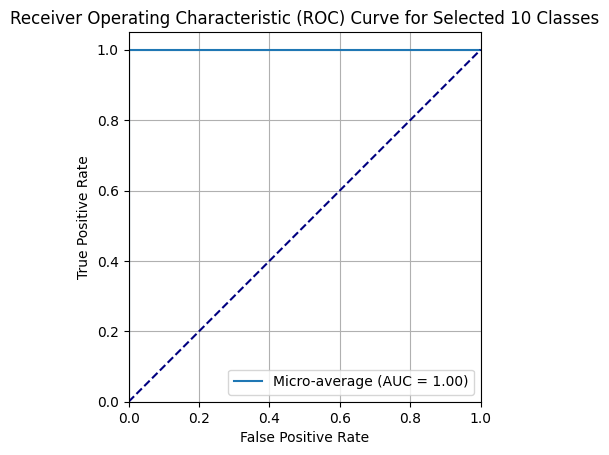

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.preprocessing import label_binarize
import random

# Select 10 random classes from your dataset
random.seed(42)  # Set seed for reproducibility
selected_classes = random.sample(range(num_classes), 10)

# Convert labels to binary matrix representation for selected classes
y_test_bin = label_binarize(y_test.argmax(axis=1), classes=np.arange(num_classes))

# Predict probabilities for each class
y_score = model.predict(X_test)

# Compute ROC curve and ROC area for each selected class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in selected_classes:
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area for selected classes
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin[:, selected_classes].ravel(), y_score[:, selected_classes].ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for each selected class using RocCurveDisplay
plt.figure(figsize=(10, 8))
for i in selected_classes:
    roc_display = RocCurveDisplay(fpr=fpr[i], tpr=tpr[i], roc_auc=roc_auc[i], estimator_name=f'Class {i}')
    roc_display.plot()

# Plot micro-average ROC curve
roc_display = RocCurveDisplay(fpr=fpr["micro"], tpr=tpr["micro"], roc_auc=roc_auc["micro"], estimator_name='Micro-average')
roc_display.plot()

# Plot random classifier line
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Labeling and formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Selected 10 Classes')
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [ ]:
import tkinter as tk
from tkinter import filedialog, messagebox, Label
from PIL import Image, ImageTk
import tensorflow as tf
import numpy as np
import cv2
import json
import os

# Load the TensorFlow model
model_path = r"H:\1.organized\allModel\1.best_CustomCNN_cow_identifier_model.h5"
model = tf.keras.models.load_model(model_path)

# Load the label encoder JSON file
label_encoder_path = r"H:\1.organized\allModel\1.best_CustomCNN_cow_label_encoder.json"
with open(label_encoder_path, "r") as f:
    label_encoder = json.load(f)

# Ensure keys in the label encoder are strings
index_to_label = {str(v): k for k, v in label_encoder.items()}

def predict_cow_name(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (128, 128)).astype('float32') / 255.0
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    img = np.expand_dims(img, axis=-1)  # Add channel dimension

    output_data = model.predict(img)
    predicted_index = np.argmax(output_data)
    predicted_index_str = str(predicted_index)

    if predicted_index_str in index_to_label:
        return index_to_label[predicted_index_str]
    else:
        return "Unknown Cow"

def load_image():
    img_path = filedialog.askopenfilename(filetypes=[("Image files", "*.jpg;*.jpeg;*.png")])
    if img_path:
        # Update loaded image label
        loaded_image_label.config(text=f"Loaded Image: {os.path.basename(img_path)}")

        img = Image.open(img_path)
        img.thumbnail((500, 500))  # Resize image to fit in the panel
        img = ImageTk.PhotoImage(img)
        panel.config(image=img)
        panel.image = img

        # Get prediction
        cow_name = predict_cow_name(img_path)
        messagebox.showinfo("Prediction", f"Indentified cow name: {cow_name}")

# Create the main window
root = tk.Tk()
root.title("Cow Nose Print Identifier")

# Set the size of the main window
root.geometry("600x500")  # Width x Height

# Add a panel for the image
panel = tk.Label(root, borderwidth=2, relief="groove")
panel.pack(fill="both", expand=True, padx=20, pady=20)

# Add a label for the loaded image
loaded_image_label = tk.Label(root, text="Loaded Image: None", font=("Arial", 12))
loaded_image_label.pack(pady=10)

# Add a button to load the image
btn = tk.Button(root, text="Load Image", command=load_image, font=("Arial", 14), bg="#4CAF50", fg="white", padx=10, pady=5)
btn.pack(pady=10)

# Start the GUI event loop
root.mainloop()


1/1 [==============================] - 0s 15ms/step
